In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import contextily as ctx
import rasterio
from rasterio.plot import show
import earthpy.plot as ep
from pprint import pprint
from tqdm import tqdm

In [26]:
PATH = "D:/code/polsci_scrapers/copernicus"

In [38]:
rasters = {}
for year in range(1975, 2035, 5):
    rasters[year] = rasterio.open(f"{PATH}/ghsl/odisha/merged/GHS_BUILT_S_E{year}_GLOBE_R2023A_4326_3ss_V1_0_merged.tif")

In [39]:
urbanization = {}
for year in range(1980, 2030, 5):
    new = rasters[year].read(1)
    old = rasters[year-5].read(1)
    urbanization[year] = new - old

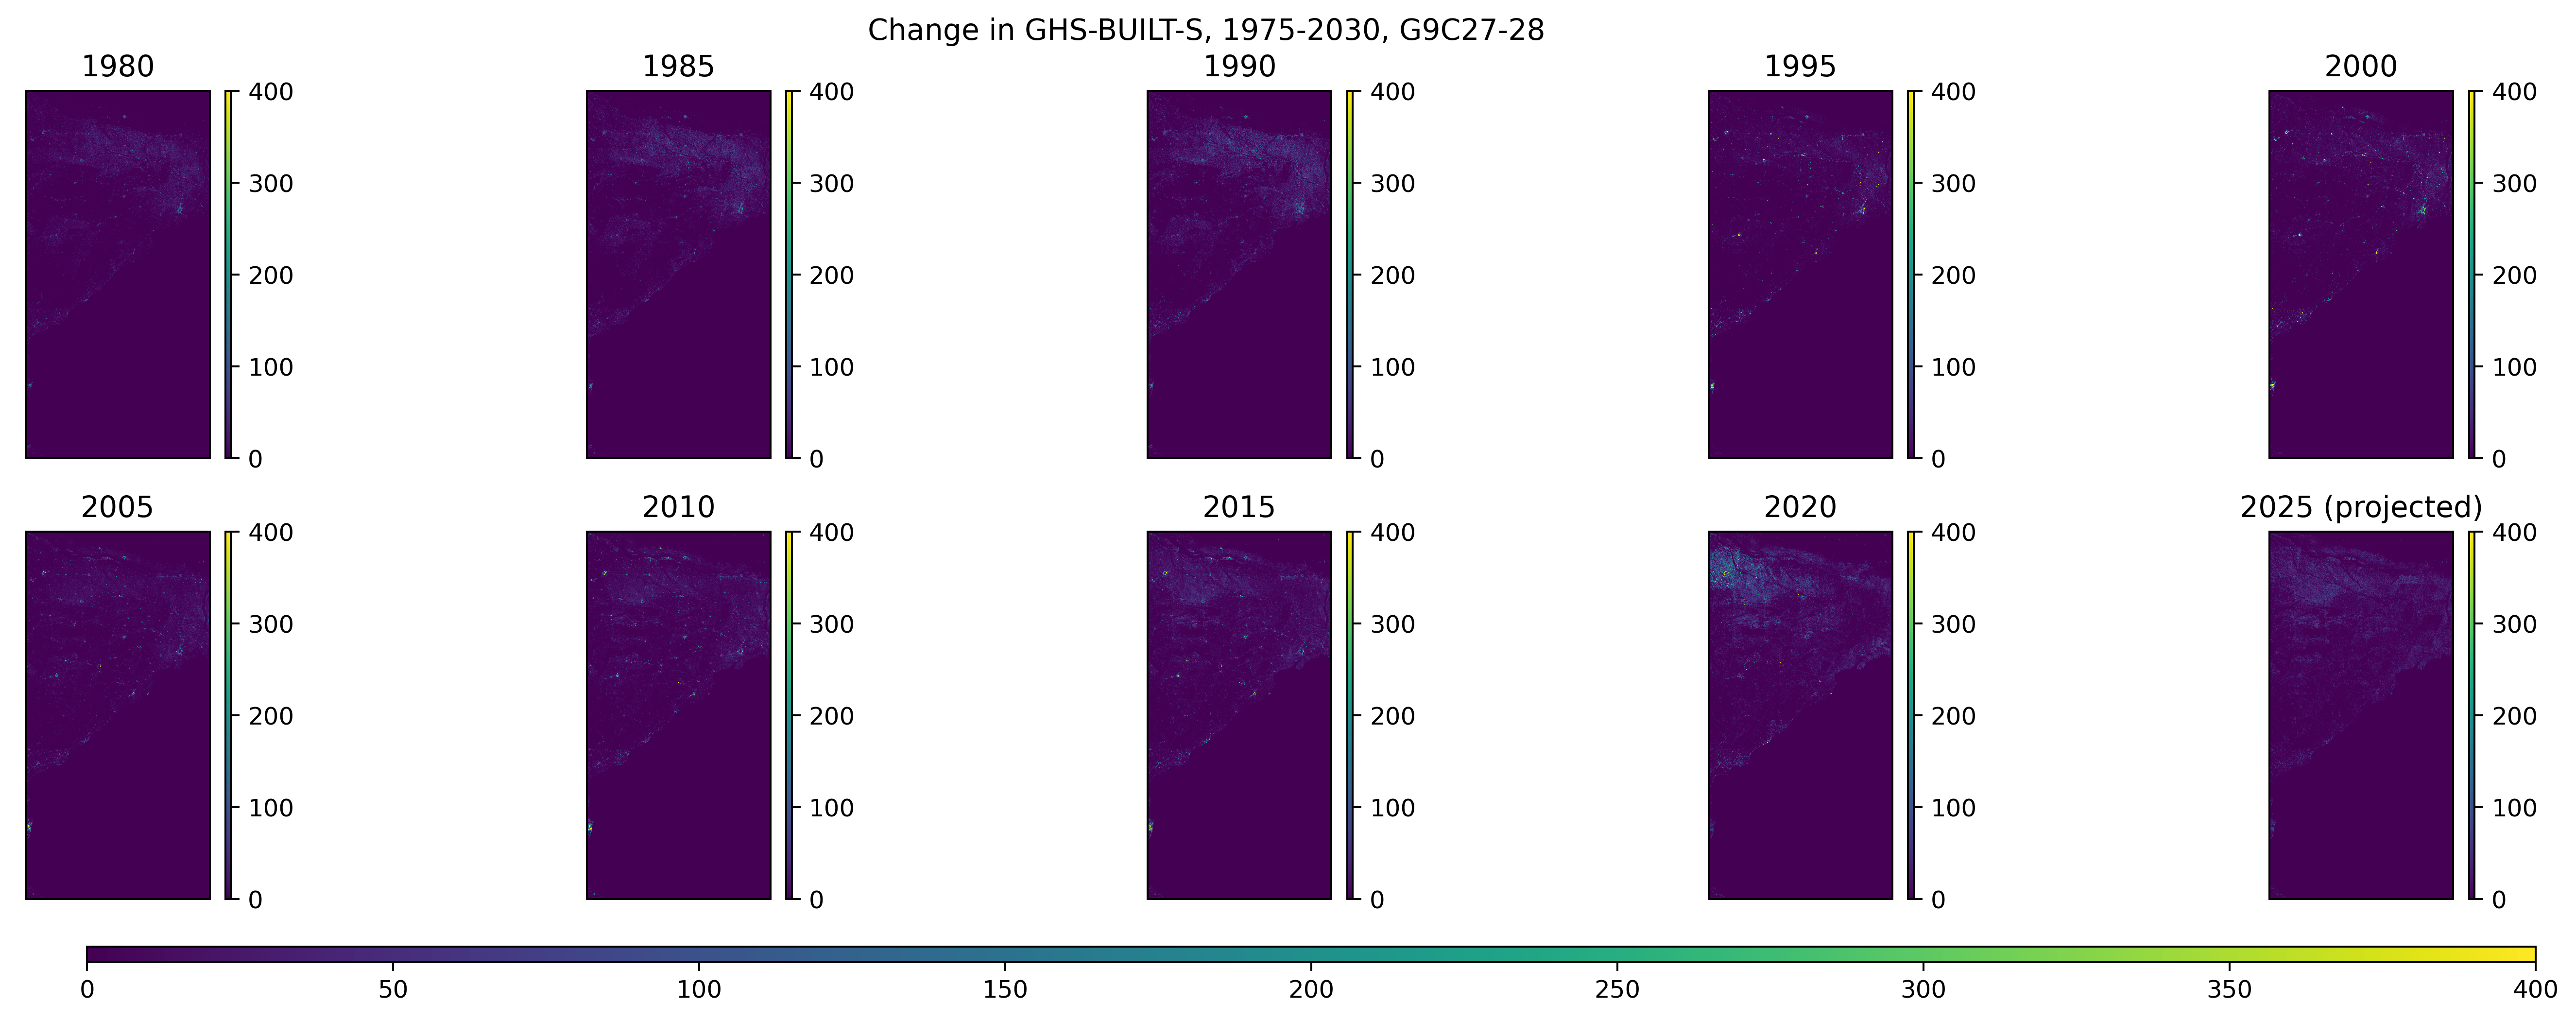

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20, 6), dpi=360)
fig.suptitle("Change in GHS-BUILT-S, 1975-2030, G9C27-28", x=0.5, y=0.95)

for year in range(1980, 2030, 5):
    row = 0 if year < 2005 else 1
    column = int((((year+5)-2005)/5)-1) % 5

    ep.plot_bands(urbanization[year], cmap='viridis', ax=axes[row][column], vmax=400)
    axes[row][column].set_title(year if year <= 2024 else f"{year} (projected)")
    # ctx.add_basemap(ax, zoom=19, crs=gdf.crs.to_string())

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=urbanization[1995].min(), vmax=400))
cbar_ax = fig.add_axes([0.18, 0.05, 0.7, 0.015])
fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")